# <ins>Análise de Resultados</ins>

In [25]:
import pandas as pd
import numpy as np
import psycopg2 as psql
import matplotlib.pyplot as plt

### Conectando ao banco de dados

In [9]:
conn = psql.connect(
    host='localhost',
    database='algoritmos',
    user='postgres',
    password='ypghck52'
)

cur = conn.cursor()

C:\Users\guisn\AppData\Local\Temp\ipykernel_15400\3272460915.py:24: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  ax.legend([bubble, merge, quick], ['Bubble sort', 'Merge sort', 'Quick sort'])


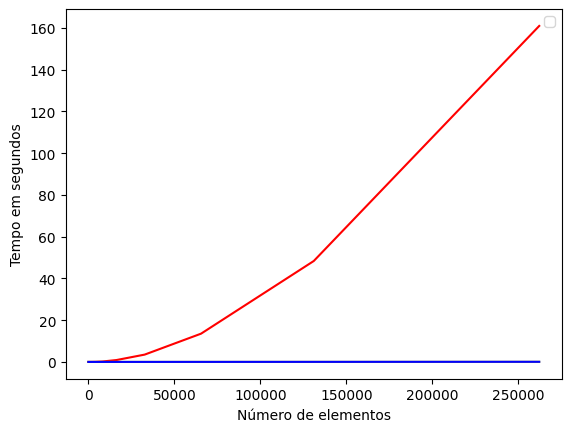

In [47]:
cur.execute('SELECT cpu, ram FROM hardware WHERE id = 1')
cpu, ram = cur.fetchone()
cur.execute('SELECT * FROM bubble(1)')
bubble_results = pd.DataFrame(cur.fetchall(), columns=[f'{cpu} {str(ram)} GB RAM', 'hardware_id', 'size', 'time1', 'time2', 'time3', 'time4', 'time5'])
bubble_results = bubble_results.drop(['hardware_id'], axis=1)
bubble_results['avg'] = bubble_results[['time1', 'time2', 'time3' , 'time4', 'time5']].mean(axis=1)/10e5
bubble_results
cur.execute('SELECT * FROM merge(1)')
merge_results = pd.DataFrame(cur.fetchall(), columns=[f'{cpu} {str(ram)} GB RAM', 'hardware_id', 'size', 'time1', 'time2', 'time3', 'time4', 'time5'])
merge_results = merge_results.drop(['hardware_id'], axis=1)
merge_results['avg'] = merge_results[['time1', 'time2', 'time3' , 'time4', 'time5']].mean(axis=1)/10e5
merge_results
cur.execute('SELECT * FROM quick(1)')
quick_results = pd.DataFrame(cur.fetchall(), columns=[f'{cpu} {str(ram)} GB RAM', 'hardware_id', 'size', 'time1', 'time2', 'time3', 'time4', 'time5'])
quick_results = quick_results.drop(['hardware_id'], axis=1)
quick_results['avg'] = quick_results[['time1', 'time2', 'time3' , 'time4', 'time5']].mean(axis=1)/10e5
quick_results
plt.plot(bubble_results['size'].tolist(), bubble_results['avg'].tolist(), 'r', label=, merge_results['size'].tolist(), merge_results['avg'].tolist(), 'y', quick_results['size'].tolist(), quick_results['avg'].tolist(), 'b')
plt.xlabel('Número de elementos')
plt.ylabel('Tempo em segundos')
plt.show()

### Lembrando:

* Bubble Sort: $O(n^2)$
* Quick Sort: $O(n*log(n))$ - em média
* Merge Sort: $O(n*log(n))$ - para os piores casos

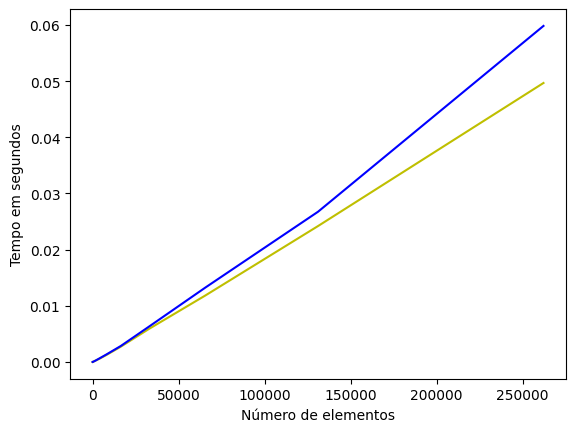

In [44]:
plt.plot(merge_results['size'].tolist(), merge_results['avg'].tolist(), 'y', quick_results['size'].tolist(), quick_results['avg'].tolist(), 'b')
plt.xlabel('Número de elementos')
plt.ylabel('Tempo em segundos')
plt.show()